# Plotting a Spectrum
This notebook explains how to read and plot a spectrum for the ```cv_standard``` file found in the examples. Before running the python commands, you need to run the model from the command line. I suggest running the following commands, after you have compiled python:

    mkdir cv_test
    cd cv_test
    cp $SIROCCO/examples/basic/cv_standard.pf .
    sirocco cv_standard 
    
The model will take about 5 minutes to run on a single core. It will not converge and the spectrum will be a bit noisy, but will give us a model to use as an example. 

One simple to make a quick look spectrum plot is using the ```plot_spec.py``` routine in ```$SIROCCO/py_progs```. In this example, I will assume py_progs has been added to ```$PATH``` and to ```$PYTHONPATH```. ```plot_spec.py``` can be run from the command line using

    plot_spec.py [-wmin 850 -wmax 1850 -smooth 21] cv_standard
    
where the flags control the minimum and maximum wavelengths. An alternative route is to use the pysi package, or work directly with the raw data. We briefly give examples of both of these approaches here. 

## Plotting spectra with pysi

First we will set up the basic modules to import, then make a few different style plots. 

In [79]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = "True"
from pysi.spec import Spectrum
import pysi 
import numpy as np 

We started by creating a plot directly using the Spectrum class. In this case we make a linear plot of the CV model spectrum at 62 degrees. 

('10', '28', '45', '62', '80')


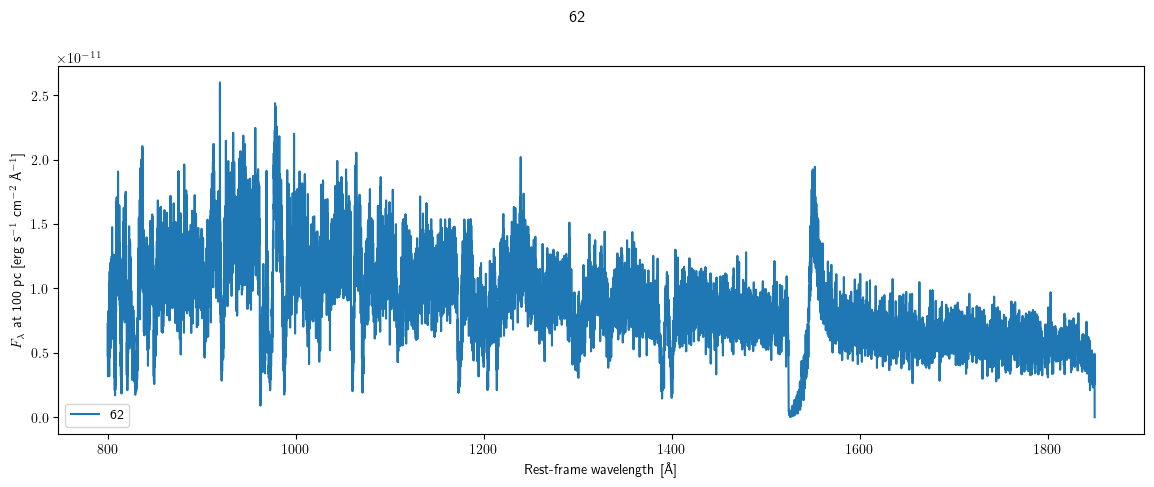

In [81]:
# Create a plot directly using the Spectrum class
# in this case we make a linear plot of the CV model spectrum at 62 degrees. 
s = Spectrum("cv_test/cv_standard")
print (s["inclinations"])
fig, ax = s.plot("62", ax_scale="linlin")

We can also make a log-log plot, with all axes plotted on the same figure. 

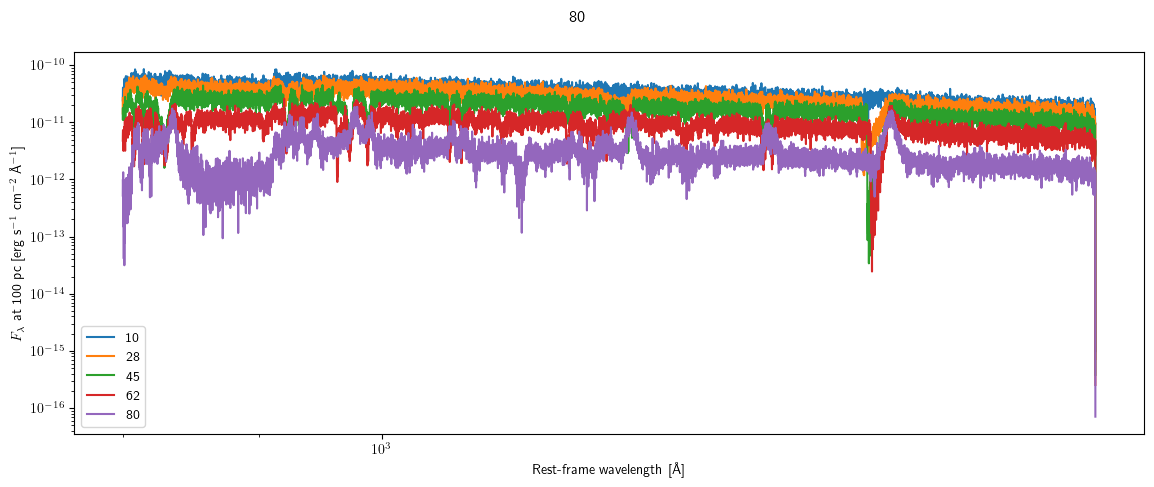

In [83]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
for i in s["inclinations"]:
    s.plot(i, fig=fig, ax=ax, ax_scale="loglog")

We can also look at the total angle averaged spectrum using the log_spec_tot file. For example, we can look at the total emitted spectrum (spectrum that escapes to infinity) by first switching spectrum type, then plotting. 

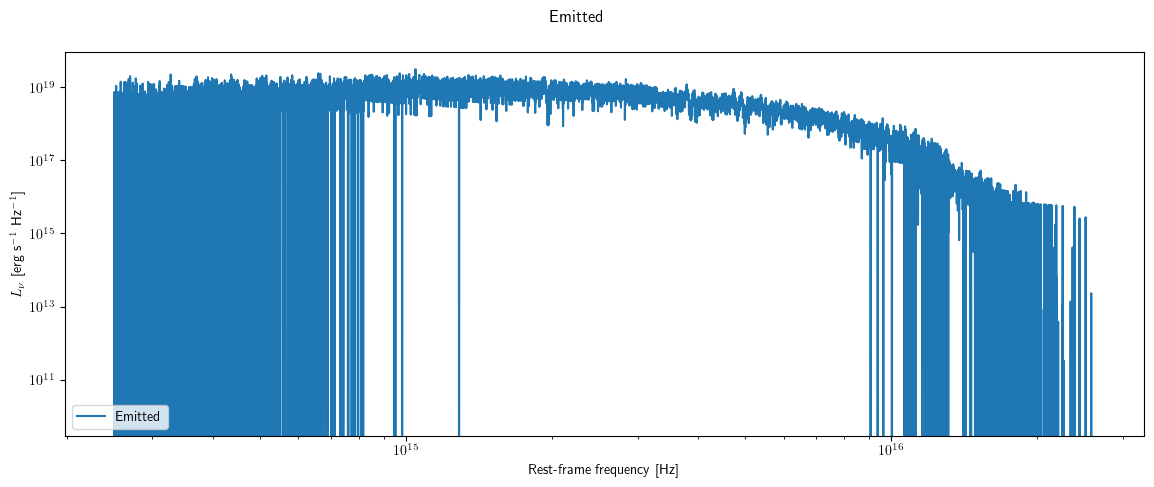

In [84]:
s.set_spectrum("spec_tot")
_ = s.plot("Emitted")

In the spec_tot spectrum, again most of the keys correspond to columns in the spectrum. 

In [88]:
print (s["spec_tot"].keys()) 

dict_keys(['units', 'spectral_axis', 'distance', 'Freq.', 'Lambda', 'Created', 'WCreated', 'Emitted', 'CenSrc', 'Disk', 'Wind', 'HitSurf', 'columns', 'inclinations', 'num_inclinations'])


Some important ones are:
* **Created:** total spectrum of all of the photons paakets as created, that is before having been translated through the wind
* **WCreated:** spectrum of the photons that are created in the wind before translation
* **Emitted:** is the emergent spectrun after the photons have been translated through the wind
* **CenSrc:** is the emergent spectrum from photons bundles originating on the Star or BL,
* **Disk:** spectrum due to photons starting in the disk
* **Wind:** spectrum due to photons starting in the wind
* **HitSurf:** photons that did not escape the system but ran into a boundary

**Units:** The units of the spec_tot file are typical $L_\nu$, i.e. monochromatic or specific luminosity in CGS units. 

We can plot multiple columns on a log log plot.

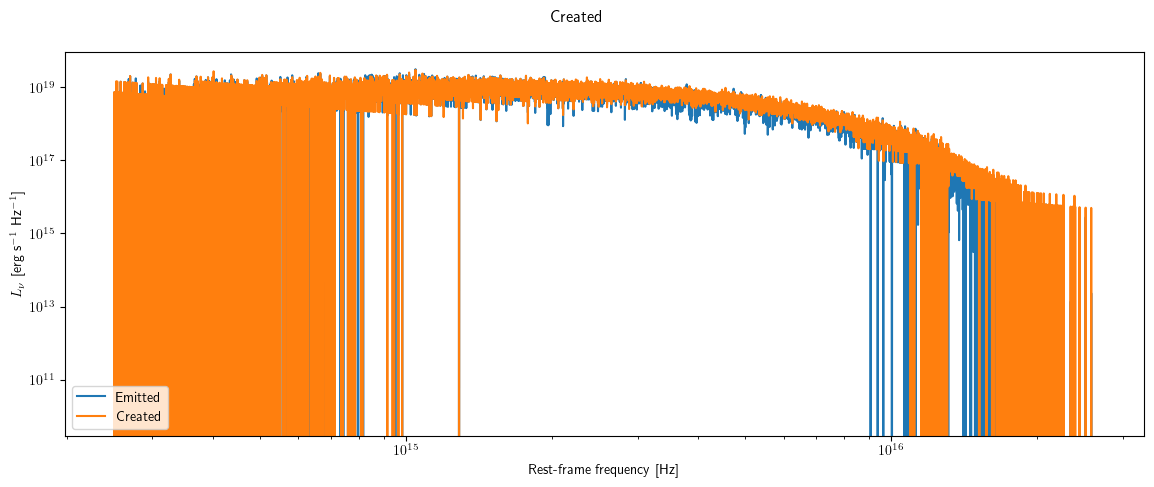

In [91]:
fig, ax = plt.subplots(1,1, figsize=(12, 5))
for i in ["Emitted", "Created"]:
    s.plot(i, fig=fig, ax=ax, ax_scale="loglog")

## Reading data without pysi 
You may, however, wish to get more direct access to the data, which can be done easily by reading in the ```cv_standard.spec``` file, for example using ```astropy```. In the next code block, we read in the spectrum file and print out the columns.

In [ ]:
import matplotlib.pyplot as plt
import astropy.io.ascii as io

s = io.read("{}.spec".format(fname))

print (s.colnames)

['Freq.', 'Lambda', 'Created', 'WCreated', 'Emitted', 'CenSrc', 'Disk', 'Wind', 'HitSurf', 'Scattered', 'A10P0.50', 'A28P0.50', 'A45P0.50', 'A62P0.50', 'A80P0.50']
['Freq.', 'Lambda', 'Created', 'WCreated', 'Emitted', 'CenSrc', 'Disk', 'Wind', 'HitSurf', 'Scattered', 'A10P0.50', 'A28P0.50', 'A45P0.50', 'A62P0.50', 'A80P0.50']


The first two columns are:
* **Freq.:** frequency in Hz
* **Lambda:** wavelength in Angstroms

The next set of columns correspond to the same as the spec_tot columns above, but only over the specific wavelength range requested.  The remaining columns show the spectrum extracted at various angles, where A45P0.50 denotes an inclination of 45 degrees with respect to the polar axis, and a phase of 0.50 relative to inferior conjunction. Phase only matters if a companion is present. 

**Units:** The units depend on whether flambda or fnu has been requested by the user, but correspond to CGS units either in per Angstrom or per Hz.

We can now plot one of the spectra. 

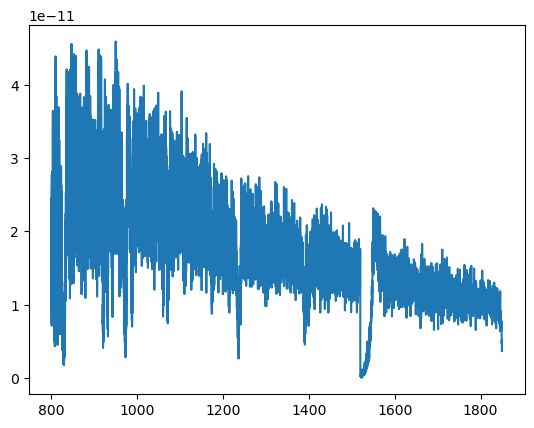

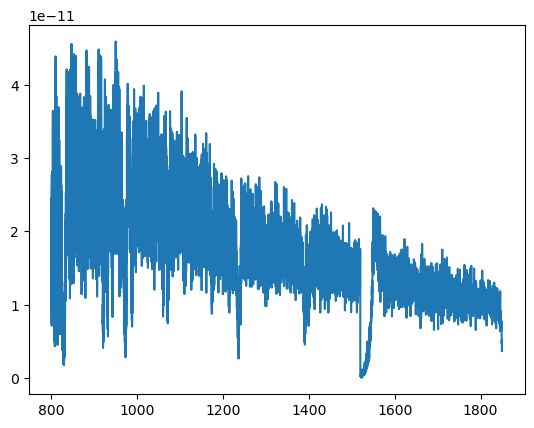

In [ ]:
angle = 45
field = "A{:.0f}P0.50".format(angle)
plt.plot(s["Lambda"], s[field])

We can also plot the components contributing to the total escaping spectrum in the requested wavelength range using the ```plot_tot.py``` script. Note that this script reads the ```cv_standard.log_spec_tot``` file and plots the flobal SED in $\nu L_\nu$ units as a function of $\nu$. This file can also be read using astropy but excludes the angle columns. 

The Created luminosity was  4.478638412507001e+34
The emitted luminosity was  3.90951228511005e+34
The Created luminosity was  4.478638412507001e+34
The emitted luminosity was  3.90951228511005e+34


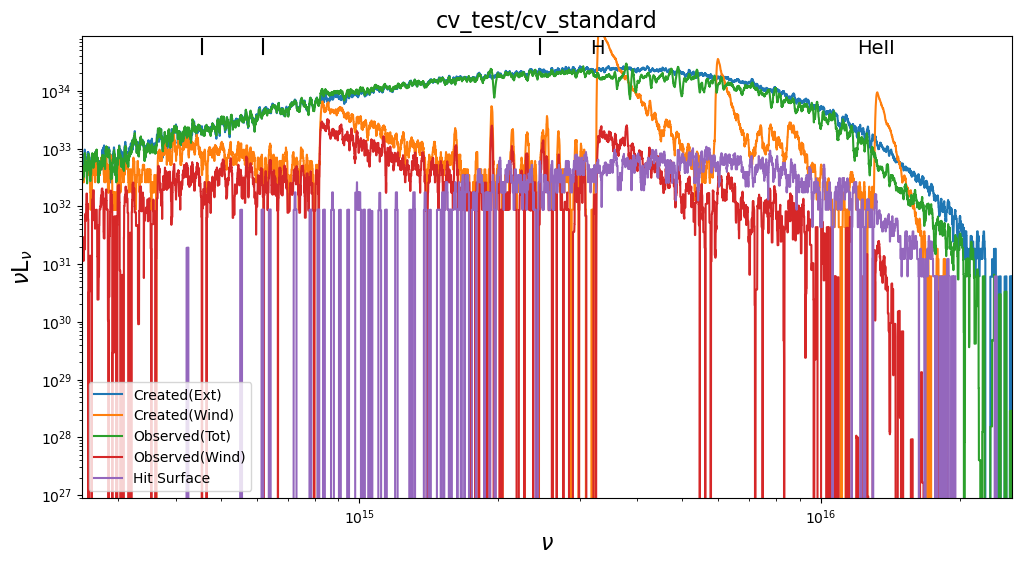

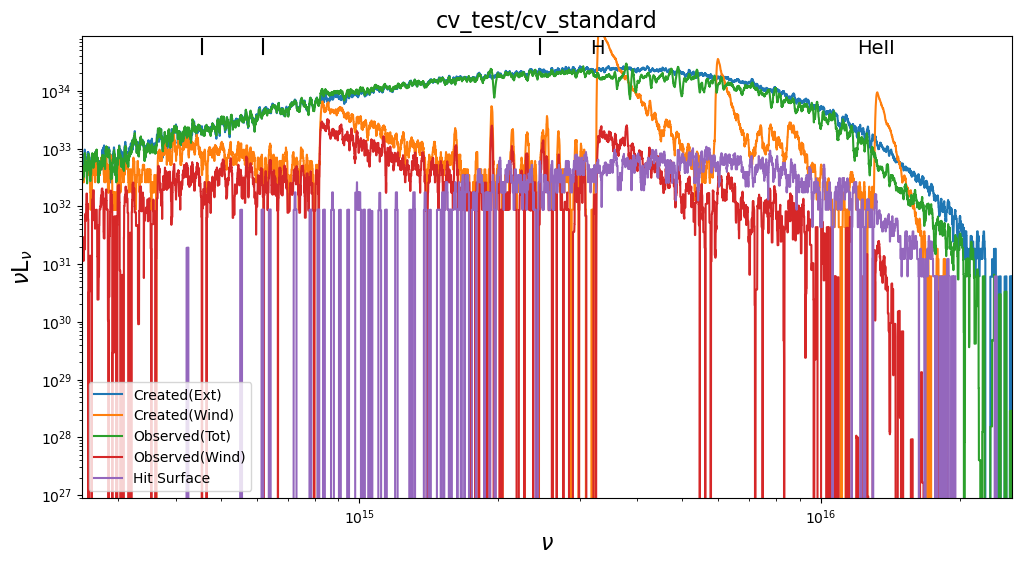

In [ ]:
import plot_tot
plot_tot.doit(fname, smooth)